In [1]:
import pandas
dataset = pandas.read_csv(
    'postcodes-dataset.csv',
    sep=";",
    dtype = {'Gender': 'string', 'Age': 'string'}
)
dataset

,ID,Gender,Age,Postcode,Population
0,22,T001038,10000,NL01,17407585.0
1,46,T001038,10000,PC0999,2035.0
2,70,T001038,10000,PC1011,9705.0
3,94,T001038,10000,PC1012,8600.0
4,118,T001038,10000,PC1013,21395.0
...,...,...,...,...,...
256783,6162814,4000,22000,PC9995,0.0
256784,6162838,4000,22000,PC9996,0.0
256785,6162862,4000,22000,PC9997,0.0
256786,6162886,4000,22000,PC9998,0.0


Now that we've imported the data, let's clean it a bit by removing all aggregate data and replacing values by human-readable lables.

In [2]:
dataset.Postcode = dataset.Postcode.str.strip()
dataset = dataset[dataset.Postcode != 'NL01']
dataset = dataset[dataset.Postcode != 'PC0999']
dataset.Gender = dataset.Gender.str.strip()
gender_dict = {'T001038': 'Total', '3000': 'M', '4000': 'F'}
dataset.Gender = dataset.Gender.replace(gender_dict)
dataset = dataset[dataset.Gender != 'Total']
age_dict = dict([('10000', 'Total'), ('22000', '95+')] + [(str(70100 + 100 * i ), '%d-%d'%(5*i,5*(i+1))) for i in range(19)])
dataset.Age = dataset.Age.replace(age_dict)
dataset = dataset[dataset.Age != 'Total']
dataset

,ID,Gender,Age,Postcode,Population
89674,2152198,M,0-5,PC1011,130.0
89675,2152222,M,0-5,PC1012,85.0
89676,2152246,M,0-5,PC1013,515.0
89677,2152270,M,0-5,PC1014,120.0
89678,2152294,M,0-5,PC1015,220.0
...,...,...,...,...,...
256783,6162814,F,95+,PC9995,0.0
256784,6162838,F,95+,PC9996,0.0
256785,6162862,F,95+,PC9997,0.0
256786,6162886,F,95+,PC9998,0.0


Now we can turn it to a pivot table!

In [3]:
dataset['PC2D'] = dataset['Postcode'].str[:4]
pivoted_data = dataset.pivot(index=['PC2D','Postcode'],columns=['Gender', 'Age'],values='Population')
pivoted_data

Gender             M                                                     \
Age              0-5   5-10  10-15  15-20  20-25   25-30   30-35  35-40   
PC2D Postcode                                                             
PC10 PC1011    130.0  110.0  125.0  125.0  355.0   575.0   495.0  380.0   
     PC1012     85.0   60.0   55.0   80.0  510.0   925.0   715.0  425.0   
     PC1013    515.0  355.0  375.0  340.0  485.0  1065.0  1085.0  935.0   
     PC1014    120.0   60.0   25.0   20.0   35.0   105.0   170.0  165.0   
     PC1015    220.0  185.0  185.0  260.0  460.0   765.0   790.0  585.0   
...              ...    ...    ...    ...    ...     ...     ...    ...   
PC99 PC9995     15.0   30.0   20.0   25.0   20.0    15.0    15.0   25.0   
     PC9996      0.0    0.0    0.0    5.0    5.0     0.0     5.0    0.0   
     PC9997     10.0   20.0   20.0   20.0   15.0    15.0    15.0   10.0   
     PC9998     10.0    5.0   10.0    5.0    5.0     5.0     0.0    5.0   
     PC9999      0.0    0.0    5.0    5.0    5.0     0.0     0.0    0.0   

Gender                       ...      F                                     \
Age            40-45  45-50  ...  50-55  55-60  60-65  65-70  70-75  75-80   
PC2D Postcode                ...                                             
PC10 PC1011    305.0  375.0  ...  280.0  305.0  340.0  340.0  255.0  135.0   
     PC1012    345.0  310.0  ...  165.0  145.0  140.0  120.0  125.0   55.0   
     PC1013    835.0  805.0  ...  730.0  740.0  700.0  600.0  505.0  255.0   
     PC1014    105.0   95.0  ...   65.0   40.0   30.0   20.0   15.0   15.0   
     PC1015    505.0  600.0  ...  530.0  500.0  410.0  440.0  405.0  220.0   
...              ...    ...  ...    ...    ...    ...    ...    ...    ...   
PC99 PC9995     15.0   35.0  ...   35.0   30.0   20.0   10.0   15.0   10.0   
     PC9996      0.0    0.0  ...    0.0    0.0    0.0    5.0    5.0    0.0   
     PC9997     15.0   30.0  ...   25.0   30.0   20.0   15.0   20.0   10.0   
     PC9998      5.0   10.0  ...    5.0   10.0   10.0    5.0    5.0    5.0   
     PC9999      5.0    0.0  ...    0.0   10.0    5.0   10.0    0.0    5.0   

Gender                                  
Age            80-85 85-90 90-95   95+  
PC2D Postcode                           
PC10 PC1011     80.0  45.0  25.0  10.0  
     PC1012     25.0  10.0   0.0   0.0  
     PC1013    145.0  85.0  40.0  10.0  
     PC1014      0.0   0.0   0.0   0.0  
     PC1015    120.0  55.0  10.0  10.0  
...              ...   ...   ...   ...  
PC99 PC9995     10.0   5.0   0.0   0.0  
     PC9996      0.0   0.0   0.0   0.0  
     PC9997      5.0   0.0   0.0   0.0  
     PC9998      0.0   0.0   0.0   0.0  
     PC9999      0.0   0.0   0.0   0.0  

[4074 rows x 40 columns]

### How is population distributed in Postcodes (4-digit level)?

count     4074.000000
mean      4272.347815
std       4297.542682
min          0.000000
25%        681.250000
50%       2657.500000
75%       7005.000000
max      28495.000000
dtype: float64

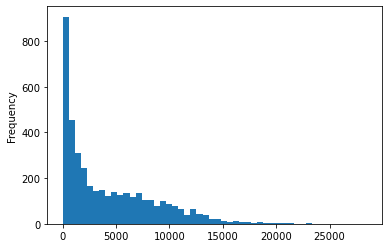

In [4]:
pivoted_data.sum(axis=1).plot.hist(bins=50)
pivoted_data.sum(axis=1).describe()

### Calculating sex ratio, 65+ and 20- at the 2-digit postcode level

In [6]:
data_2d = pivoted_data.groupby(axis=0,level=0).sum()
data_2d['total_population'] = data_2d.sum(axis=1)
data_2d['sex_ratio'] = data_2d['M'].sum(axis=1)/data_2d['F'].sum(axis=1)
age_data = data_2d.groupby(level=1,axis=1).sum()
data_2d['under_20'] = ( age_data['0-5'] + age_data['10-15'] + age_data['15-20'] ) / data_2d.total_population
data_2d['over_65'] = ( age_data['60-65'] + age_data['70-75'] + age_data['75-80'] + age_data['80-85'] + age_data['85-90'] + age_data['90-95'] + age_data['95+'] ) / data_2d.total_population
data_2d['working_age'] = 1 - ( data_2d['under_20'] + data_2d['over_65'] )
data_2d

Gender        M                                                        \
Age         0-5     5-10    10-15    15-20    20-25    25-30    30-35   
PC2D                                                                    
PC10    21100.0  18290.0  17305.0  17685.0  26400.0  43890.0  42130.0   
PC11     8140.0   8780.0   8765.0   9240.0  11010.0  10635.0  10055.0   
PC12     4495.0   4915.0   5050.0   5470.0   4215.0   4485.0   4800.0   
PC13     7945.0   7920.0   8080.0   8545.0   7670.0   8120.0   8875.0   
PC14     5625.0   6280.0   7080.0   7545.0   6375.0   6055.0   6050.0   
...         ...      ...      ...      ...      ...      ...      ...   
PC95     1470.0   1680.0   1880.0   2105.0   1805.0   1615.0   1680.0   
PC96     3305.0   3735.0   4070.0   4505.0   3945.0   3700.0   3855.0   
PC97     5545.0   5500.0   5635.0   7520.0  17520.0  13980.0   9730.0   
PC98     1015.0   1115.0   1220.0   1375.0    995.0    915.0   1015.0   
PC99     1795.0   2030.0   2320.0   2700.0   2165.0   2135.0   2015.0   

Gender                             ...       F                                 \
Age       35-40    40-45    45-50  ...   75-80   80-85   85-90   90-95    95+   
PC2D                               ...                                          
PC10    32510.0  26145.0  26040.0  ...  9415.0  6605.0  4115.0  2025.0  655.0   
PC11     9845.0   9225.0   9900.0  ...  5325.0  3935.0  2660.0  1250.0  390.0   
PC12     5100.0   5105.0   6015.0  ...  3910.0  2950.0  1955.0   965.0  320.0   
PC13     8600.0   7925.0   8930.0  ...  2950.0  2020.0  1280.0   540.0  150.0   
PC14     6125.0   6650.0   8255.0  ...  4830.0  3620.0  2385.0  1080.0  310.0   
...         ...      ...      ...  ...     ...     ...     ...     ...    ...   
PC95     1615.0   1765.0   2295.0  ...  1660.0  1245.0   820.0   345.0  105.0   
PC96     4045.0   4140.0   5555.0  ...  3345.0  2410.0  1455.0   705.0  230.0   
PC97     7830.0   6875.0   7400.0  ...  3705.0  2865.0  2050.0   925.0  320.0   
PC98     1060.0   1090.0   1355.0  ...   730.0   430.0   300.0   145.0   40.0   
PC99     2090.0   2190.0   2940.0  ...  1985.0  1435.0   900.0   395.0  140.0   

Gender total_population sex_ratio  under_20   over_65 working_age  
Age                                                                
PC2D                                                               
PC10           782525.0  0.983160  0.141682  0.136002    0.722316  
PC11           306305.0  0.963116  0.167072  0.185126    0.647802  
PC12           173565.0  0.952143  0.168554  0.223000    0.608446  
PC13           254865.0  0.979073  0.188551  0.149079    0.662370  
PC14           228740.0  0.963686  0.171242  0.210763    0.617994  
...                 ...       ...       ...       ...         ...  
PC95            67730.0  0.987966  0.156282  0.255057    0.588661  
PC96           149525.0  1.002478  0.154790  0.236282    0.608928  
PC97           255785.0  0.987220  0.147253  0.160662    0.692085  
PC98            37180.0  1.026710  0.186928  0.201452    0.611619  
PC99            83830.0  1.010071  0.158297  0.253012    0.588691  

[90 rows x 45 columns]

### Some statistics on postcodes (2-digit level)

In [7]:
cols = ['total_population', 'under_20', 'over_65', 'sex_ratio', 'working_age']
data_2d[cols].describe()

Gender,total_population,under_20,over_65,sex_ratio,working_age
Age,,,,,
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,193394.944444,0.165345,0.212448,0.990703,0.622207
std,114448.746326,0.013137,0.028664,0.020990,0.027128
min,35690.000000,0.132214,0.109772,0.945527,0.583947
25%,121388.750000,0.157658,0.195958,0.975530,0.604351
50%,182220.000000,0.165364,0.214909,0.989754,0.616752
75%,241720.000000,0.174903,0.231941,1.005728,0.632696
max,782525.000000,0.192699,0.274304,1.037912,0.736122


'Total population'

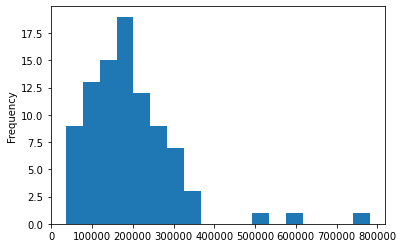

In [8]:
data_2d.total_population.plot.hist(bins=18)
'Total population'

'Share of working age population'

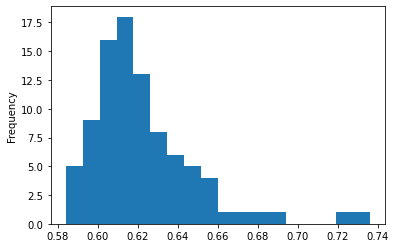

In [9]:
data_2d.working_age.plot.hist(bins=18)
'Share of working age population'

### What are the correlations?

In [10]:
data_2d[cols].corr()

,Gender,total_population,under_20,over_65,sex_ratio,working_age
,Age,,,,,
Gender,Age,,,,,
total_population,,1.000000,-0.107001,-0.629072,-0.265235,0.716495
under_20,,-0.107001,1.000000,-0.342913,0.169201,-0.121950
over_65,,-0.629072,-0.342913,1.000000,0.137928,-0.890538
sex_ratio,,-0.265235,0.169201,0.137928,1.000000,-0.227675
working_age,,0.716495,-0.121950,-0.890538,-0.227675,1.000000


In [11]:
pandas.DataFrame(
    [(col, data_2d[col].idxmin(), data_2d[col].min(), data_2d[col].idxmax() ,data_2d[col].max()) for col in cols],
    columns = ['Variable', 'Minimum Postcode', 'Minimum Value', 'Maximum Postcode', 'Maximum Value']
)

,Variable,Minimum Postcode,Minimum Value,Maximum Postcode,Maximum Value
0,total_population,PC87,35690.000000,PC10,782525.000000
1,under_20,PC64,0.132214,PC83,0.192699
2,over_65,PC35,0.109772,PC63,0.274304
3,sex_ratio,PC62,0.945527,PC56,1.037912
4,working_age,PC72,0.583947,PC35,0.736122


#### Is there a significant difference between how many people are of working age in 2-digit postcodes > 250K and < 100K inhabitants?

In [12]:
above_250 = data_2d.working_age[data_2d.total_population >= 250000]
below_100 = data_2d.working_age[data_2d.total_population <= 100000]
from scipy import stats
print('\n Working age for postcodes >= 250K')
print(above_250.describe())
print('\n Working age for postcodes <= 100K')
print(below_100.describe())
print('\n t-test')
print(stats.ttest_ind(below_100, above_250, equal_var=False))


 Working age for postcodes >= 250K
count    22.000000
mean      0.646741
std       0.036410
min       0.601908
25%       0.616235
50%       0.636311
75%       0.660246
max       0.736122
Name: working_age, dtype: float64

 Working age for postcodes <= 100K
count    16.000000
mean      0.605238
std       0.019317
min       0.584400
25%       0.592102
50%       0.601016
75%       0.612946
max       0.659161
Name: working_age, dtype: float64

 t-test
Ttest_indResult(statistic=-4.539656414206645, pvalue=6.957579735555381e-05)


#### This may include outliers, let's try to remove extreme values of population.

In [139]:
deciles = [data_2d.total_population.quantile(i/10) for i in range(10)]
towns = data_2d[data_2d.total_population >= deciles[1]][data_2d.total_population <= deciles[3]][['total_population','working_age']]
cities = data_2d[data_2d.total_population >= deciles[7]][data_2d.total_population <= deciles[9]][['total_population','working_age']] # Includes Breda
print("Small:\n",towns.describe(),"\nBig:\n", cities.describe())
stats.ttest_ind(towns.working_age, cities.working_age, equal_var=False)

Small:
 Gender total_population working_age
Age                                
count         18.000000   18.000000
mean      106549.166667    0.608532
std        13849.880043    0.017714
min        83830.000000    0.583947
25%        96632.500000    0.595291
50%       104415.000000    0.605520
75%       120236.250000    0.615777
max       127475.000000    0.659161 
Big:
 Gender total_population working_age
Age                                
count         18.000000   18.000000
mean      263969.444444    0.634092
std        22978.057429    0.023128
min       229055.000000    0.601908
25%       244842.500000    0.613564
50%       262927.500000    0.633033
75%       278533.750000    0.648805
max       306305.000000    0.692085


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=-3.7225143416256063, pvalue=0.0007625266253274123)